## Importing libraries

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## Read the csv file

In [53]:
file_path = 'train.csv'

df = pd.read_csv(file_path)

df.columns

Index(['ID', 'Candidate', 'Constituency ∇', 'Party', 'Criminal Case',
       'Total Assets', 'Liabilities', 'state', 'Education'],
      dtype='object')

## Choosing features

In [54]:
features=['Criminal Case', 'Total Assets', 'Liabilities','Party', 'state']
X = df[features]

X.head()

,Criminal Case,Total Assets,Liabilities,Party,state
0,4,211 Crore+,2 Crore+,DMK,TAMIL NADU
1,0,1 Crore+,0,BJP,MADHYA PRADESH
2,0,7 Crore+,22 Lac+,INC,KARNATAKA
3,0,9 Crore+,24 Lac+,BJP,BIHAR
4,2,2 Crore+,61 Lac+,BJP,WEST BENGAL


In [55]:
y = df['Education']
y.head()

0         8th Pass
1        12th Pass
2    Post Graduate
3    Post Graduate
4         8th Pass
Name: Education, dtype: object

## Finding the string segments in Total Assets and liabilities

In [56]:
unique_values = X['Total Assets'].unique()

print("Unique values in 'Total Assets' column:")
print(unique_values[0:5])

unique_strings = set()
for value in unique_values:
    if isinstance(value, str):
        unique_strings.update(value.split())

print("\nUnique strings in 'Total Assets' column:")
print(unique_strings)

unique_values_liabilities = X['Liabilities'].unique()


print("Unique values in 'Liabilities' column:")
print(unique_values_liabilities[0:5])

unique_strings_liabilities = set()
for value in unique_values_liabilities:
    if isinstance(value, str):
        unique_strings_liabilities.update(value.split())

print("\nUnique strings in 'Total Assets' column:")
print(unique_strings_liabilities)

Unique values in 'Total Assets' column:
['211 Crore+' '1 Crore+' '7 Crore+' '9 Crore+' '2 Crore+']

Unique strings in 'Total Assets' column:
{'75', '17', '78', '109', '27', 'Thou+', '29', '7', '8', '111', '46', '84', '122', '50', '22', '296', '105', '189', '51', '64', '91', '35', '36', '13', '40', '159', '18', '72', '30', '15', '41', '26', '242', '69', '42', '53', '500', '25', '5', '68', '79', '183', '34', '89', '1267', '134', '187', '71', '97', '313', '24', '211', '54', '28', '191', '49', '38', '135', '39', '106', '63', '55', '98', '12', '33', '14', '76', '77', '16', '312', '73', '4', '6', '96', '163', '61', '58', '0', '115', '293', 'Lac+', '274', '1', '1156', '65', '48', '95', '141', '44', '52', '363', '112', '87', '88', '85', '67', '92', '62', '83', '31', '99', '21', '47', '59', 'Crore+', '43', '11', '74', '102', '93', '70', '56', '138', '10', '23', '86', '81', '82', '80', '668', '90', '60', '3', '45', '9', '2', '19', '32', '37', '94', '20', '66', '110', '128', '57'}
Unique values i

## Converting Total Assets and liabilities into integers

In [57]:
multiplier_mapping = {'Lac+': 1e5, 'Thou+': 1e3, 'Crore+': 1e7, 'Hund+': 1e2}


for index, value in X['Total Assets'].items():
    if isinstance(value, str):
        parts = value.split()
        if len(parts) == 2:
            numeric_value, multiplier_str = parts
            numeric_value = int(int(numeric_value) * multiplier_mapping[multiplier_str])
        else:
            numeric_value = int(value)
    else:
        numeric_value = value

    X.at[index, 'Total Assets'] = numeric_value

for index, value in X['Liabilities'].items():
    if isinstance(value, str):
        parts = value.split()
        if len(parts) == 2:
            numeric_value, multiplier_str = parts
            numeric_value = int(int(numeric_value) * multiplier_mapping[multiplier_str])
        else:
            numeric_value = int(value)
    else:
        numeric_value = value

    X.at[index, 'Liabilities'] = numeric_value

print(X.head())

   Criminal Case Total Assets Liabilities Party           state
0              4   2110000000    20000000   DMK      TAMIL NADU
1              0     10000000           0   BJP  MADHYA PRADESH
2              0     70000000     2200000   INC       KARNATAKA
3              0     90000000     2400000   BJP           BIHAR
4              2     20000000     6100000   BJP     WEST BENGAL


## Label encoding state and party

In [58]:
state_label_encoder = LabelEncoder()
party_label_encoder = LabelEncoder()

X['state'] = state_label_encoder.fit_transform(X['state'])
X['Party'] = party_label_encoder.fit_transform(X['Party'])

X.head()

<ipython-input-58-8fedcc1636ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['state'] = state_label_encoder.fit_transform(X['state'])
<ipython-input-58-8fedcc1636ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Party'] = party_label_encoder.fit_transform(X['Party'])


,Criminal Case,Total Assets,Liabilities,Party,state
0,4,2110000000,20000000,7,23
1,0,10000000,0,4,13
2,0,70000000,2200000,8,11
3,0,90000000,2400000,4,3
4,2,20000000,6100000,4,27


## Spliting training and testing data

In [59]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

print(train_X)
print(train_y)

      Criminal Case Total Assets Liabilities  Party  state
634               0    420000000    60000000     22      0
2011              1      8500000           0      2     27
1648              1     30000000     1000000     18     25
1090              2     30000000     4400000      8     11
80                1      8200000     1700000      3     18
...             ...          ...         ...    ...    ...
960               0     60000000    10000000      4     26
905               0    560000000     1900000      0      5
1096              3     20000000   100000000      8      9
235               0      6300000           0     16      3
1061              0     70000000    10000000      2     27

[1544 rows x 5 columns]
634                  Graduate
2011                 Graduate
1648            Post Graduate
1090    Graduate Professional
80                  10th Pass
                ...          
960             Post Graduate
905                  8th Pass
1096                12th Pa

## Predicting results using the fitted model

In [60]:
model_rf = RandomForestClassifier(random_state=1, n_estimators=25, max_depth=30, min_samples_split =2)

model_rf.fit(train_X, train_y)

predicted_rf = model_rf.predict(test_X)

print(f1_score(test_y, predicted_rf, average='weighted'))

0.19518831685768118


## Tuning hyper-parameters

In [61]:
choises = {
    'n_estimators': [10, 25, 50, 100],
    'max_depth': [20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 7, 10, 12]
}

data = []

for n in choises['n_estimators']:
    for d in choises['max_depth']:
        for s in choises['min_samples_split']:
            model_temp = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=s, random_state=1)
            model_temp.fit(train_X, train_y)
            y_pred = model_temp.predict(test_X)
            f1_weighted = f1_score(test_y, y_pred, average='weighted')
            data.append([n, d, s, f1_weighted])

df_rf = pd.DataFrame(data, columns=['n_estimators', 'max_depth', 'min_samples_split', 'f1_score'])

df_rf = df_rf.sort_values(by='f1_score', ascending=False)

print(df_rf.head())

    n_estimators  max_depth  min_samples_split  f1_score
78           100         20                 10  0.212542
27            25         20                  7  0.207861
29            25         20                 12  0.207082
83           100         25                 10  0.205964
76           100         20                  5  0.205442


## Importing data from test.csv

In [62]:
file_path_test = 'test.csv'

df_test = pd.read_csv(file_path_test)

df_test.columns

Index(['ID', 'Candidate', 'Constituency ∇', 'Party', 'Criminal Case',
       'Total Assets', 'Liabilities', 'state'],
      dtype='object')

## Processing testing data similar to training data

In [63]:
X_test = df_test[features]

for index, value in X_test['Total Assets'].items():
    if isinstance(value, str):
        parts = value.split()
        if len(parts) == 2:
            numeric_value, multiplier_str = parts
            numeric_value = int(int(numeric_value) * multiplier_mapping[multiplier_str])
        else:
            numeric_value = int(value)
    else:
        numeric_value = value

    X_test.at[index, 'Total Assets'] = numeric_value


for index, value in X_test['Liabilities'].items():
    if isinstance(value, str):
        parts = value.split()
        if len(parts) == 2:
            numeric_value, multiplier_str = parts
            numeric_value = int(int(numeric_value) * multiplier_mapping[multiplier_str])
        else:
            numeric_value = int(value)
    else:
        numeric_value = value

    X_test.at[index, 'Liabilities'] = numeric_value

print(X_test.head())

   Criminal Case Total Assets Liabilities Party          state
0              2    700000000   110000000   IND    MAHARASHTRA
1              1     20000000     1300000  AITC    WEST BENGAL
2              3    490000000    10000000   NCP    MAHARASHTRA
3              1     20000000           0  AITC    WEST BENGAL
4              0    160000000    20000000    SP  UTTAR PRADESH


In [64]:
X_test['state'] = state_label_encoder.fit_transform(X_test['state'])
X_test['Party'] = party_label_encoder.fit_transform(X_test['Party'])

X_test.head()

<ipython-input-64-6f28afa93045>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['state'] = state_label_encoder.fit_transform(X_test['state'])
<ipython-input-64-6f28afa93045>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Party'] = party_label_encoder.fit_transform(X_test['Party'])


,Criminal Case,Total Assets,Liabilities,Party,state
0,2,700000000,110000000,9,14
1,1,20000000,1300000,2,27
2,3,490000000,10000000,13,14
3,1,20000000,0,2,27
4,0,160000000,20000000,18,25


## Predicting the results from the model and converting it into csv file

In [65]:
predicted_rf_test = model_rf.predict(X_test)

predicted_rf_test_df=pd.DataFrame(predicted_rf_test, columns=['Education'])

predicted_rf_test_df.insert(0, 'ID', range(0, len(predicted_rf_test)))

print(predicted_rf_test_df)

predicted_rf_test_df.to_csv('prediction.csv', index=False)

        ID              Education
0        0               Graduate
1        1  Graduate Professional
2        2              12th Pass
3        3          Post Graduate
4        4               Graduate
...    ...                    ...
1369  1369          Post Graduate
1370  1370              12th Pass
1371  1371               Graduate
1372  1372              12th Pass
1373  1373          Post Graduate

[1374 rows x 2 columns]


## Distribution of candidates having more than 10 Crore assets

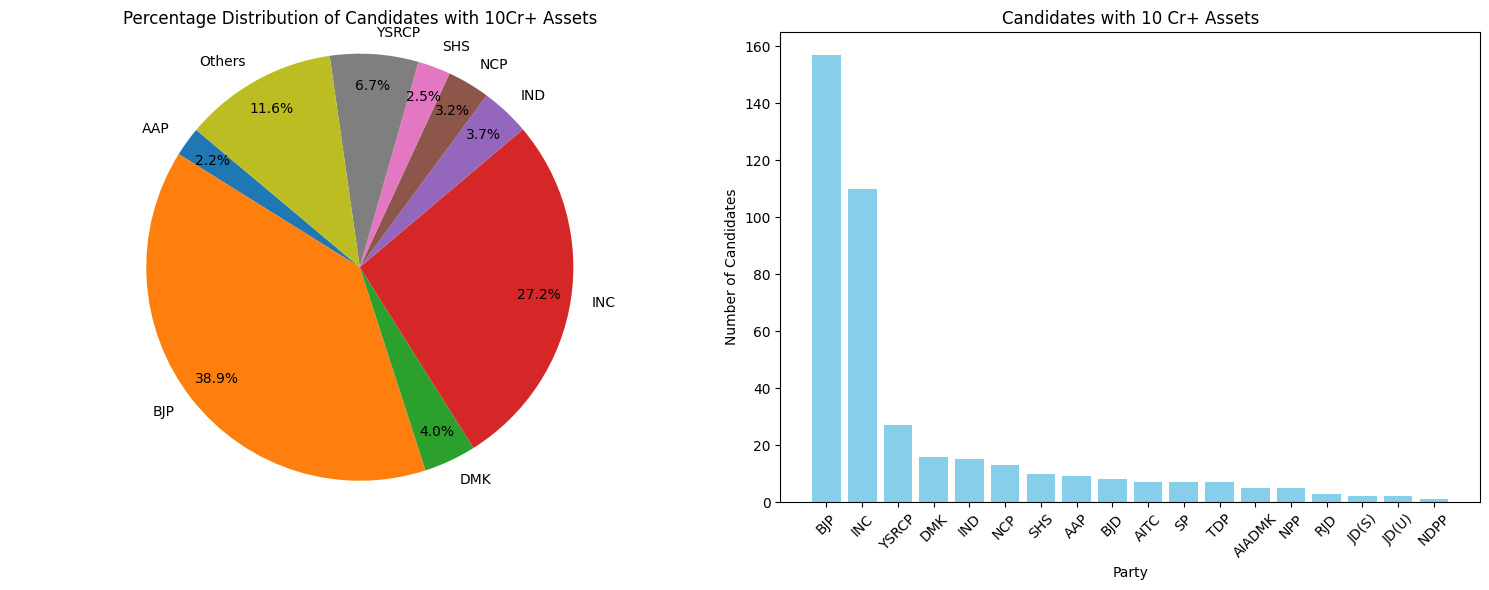

In [66]:
party_assets = X[['Party', 'Total Assets']].copy()

party_assets['Party'] = df['Party'].copy()

party_assets = party_assets[party_assets['Total Assets']>100000000]

party_distribution = party_assets['Party'].value_counts(normalize=True).sort_index() * 100

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

threshold = 2
party_distribution_others = party_distribution[party_distribution < threshold]
party_distribution_others_sum = party_distribution_others.sum()
party_distribution = party_distribution[party_distribution >= threshold]
party_distribution['Others'] = party_distribution_others_sum

axs[0].pie(party_distribution, labels=party_distribution.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
axs[0].set_title('Percentage Distribution of Candidates with 10Cr+ Assets')
axs[0].axis('equal')

string_counts = party_assets['Party'].value_counts()
axs[1].bar(string_counts.index, string_counts, color='skyblue')
axs[1].set_title('Candidates with 10 Cr+ Assets')
axs[1].set_xlabel('Party')
axs[1].set_ylabel('Number of Candidates')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Distribution of candidates having more than 10 criminal cases

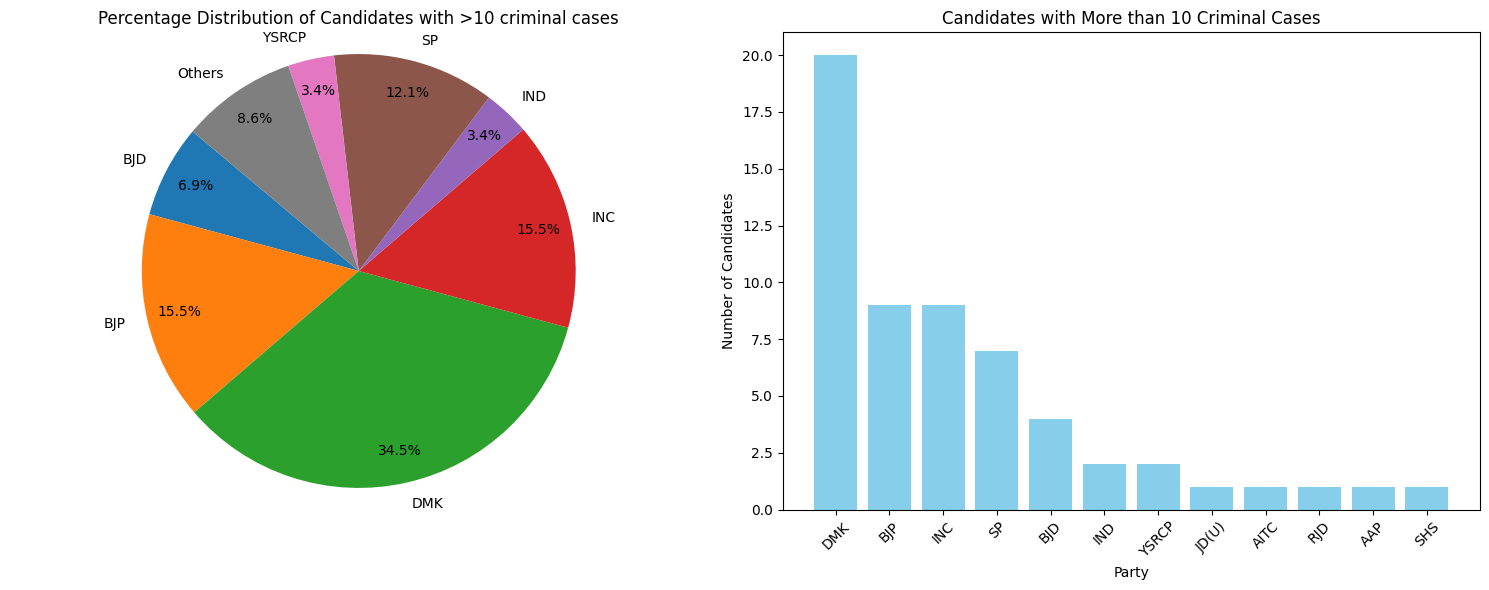

In [67]:
party_cases=df[['Party', 'Criminal Case']]

party_cases = party_cases[party_cases['Criminal Case'] > 10]

party_distribution = party_cases['Party'].value_counts(normalize=True).sort_index() * 100

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

threshold = 2
party_distribution_others = party_distribution[party_distribution < threshold]
party_distribution_others_sum = party_distribution_others.sum()
party_distribution = party_distribution[party_distribution >= threshold]
party_distribution['Others'] = party_distribution_others_sum

axs[0].pie(party_distribution, labels=party_distribution.index, autopct='%1.1f%%', startangle=140, pctdistance = 0.85)
axs[0].set_title('Percentage Distribution of Candidates with >10 criminal cases')
axs[0].axis('equal')

string_counts = party_cases['Party'].value_counts()
axs[1].bar(string_counts.index, string_counts, color='skyblue')
axs[1].set_title('Candidates with More than 10 Criminal Cases')
axs[1].set_xlabel('Party')
axs[1].set_ylabel('Number of Candidates')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Distribution of candidates having more than 1 crore liabilities

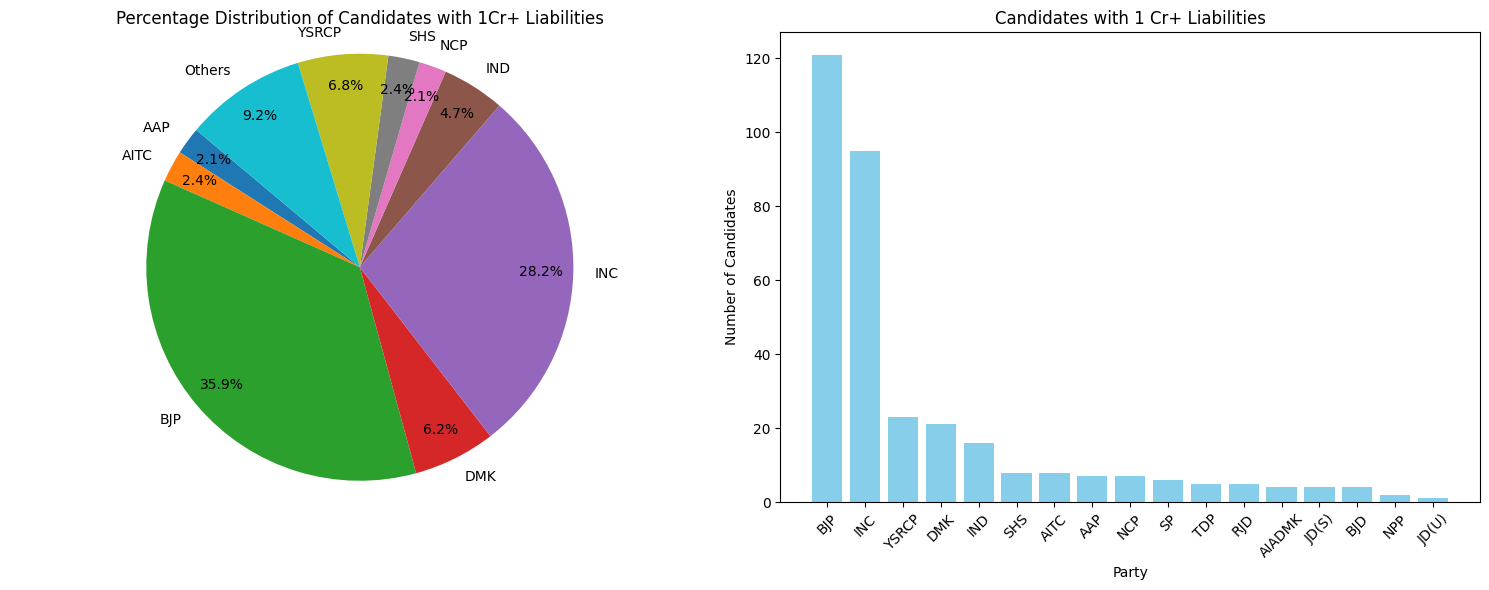

In [68]:
party_liabilities = X[['Party', 'Liabilities']].copy()

party_liabilities['Party'] = df['Party'].copy()

party_liabilities = party_liabilities[party_liabilities['Liabilities']>10000000]

party_distribution = party_liabilities['Party'].value_counts(normalize=True).sort_index() * 100

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

threshold = 2
party_distribution_others = party_distribution[party_distribution < threshold]
party_distribution_others_sum = party_distribution_others.sum()
party_distribution = party_distribution[party_distribution >= threshold]
party_distribution['Others'] = party_distribution_others_sum

axs[0].pie(party_distribution, labels=party_distribution.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
axs[0].set_title('Percentage Distribution of Candidates with 1Cr+ Liabilities')
axs[0].axis('equal')

string_counts = party_liabilities['Party'].value_counts()
axs[1].bar(string_counts.index, string_counts, color='skyblue')
axs[1].set_title('Candidates with 1 Cr+ Liabilities')
axs[1].set_xlabel('Party')
axs[1].set_ylabel('Number of Candidates')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Distribution of Graduate Candidates

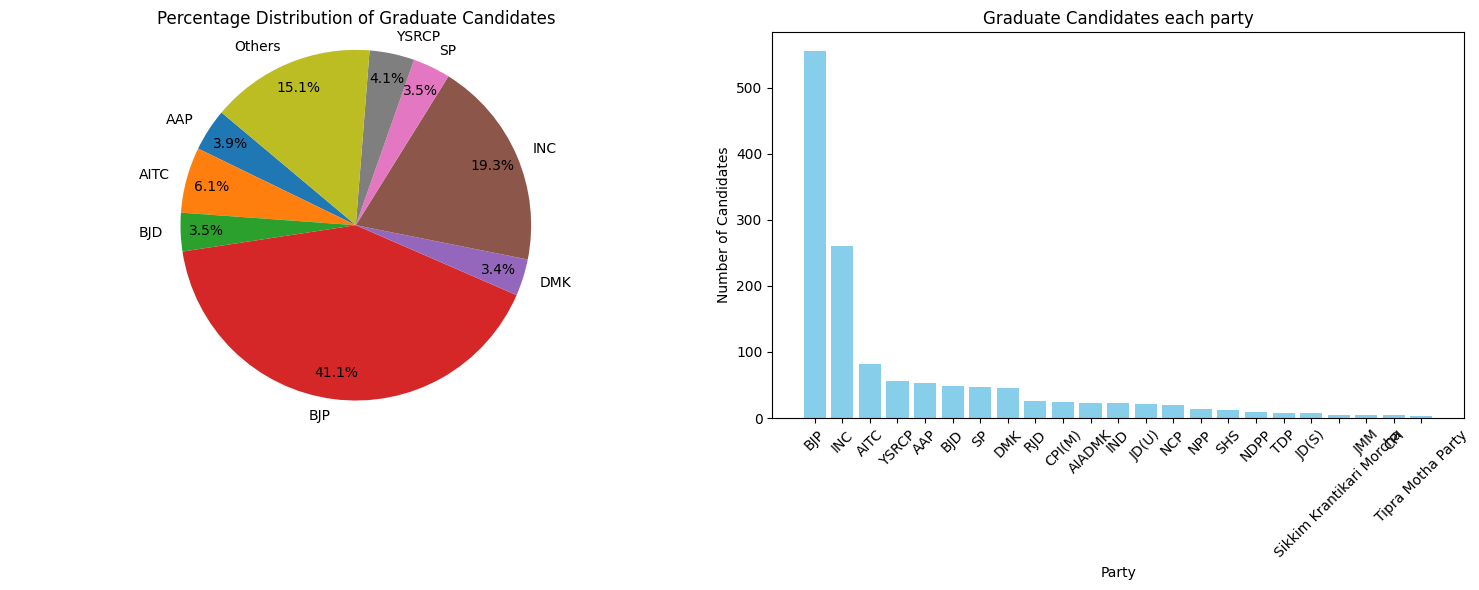

In [69]:
party_education = df[['Party', 'Education']].copy()

custom_order = {
    'Others': 0,
    'Literate': 1,
    '5th Pass': 2,
    '8th Pass': 3,
    '10th Pass': 4,
    '12th Pass': 5,
    'Graduate': 6,
    'Graduate Professional': 7,
    'Post Graduate': 8,
    'Doctorate': 9
}

party_education['Education']= party_education['Education'].map(custom_order)

party_education = party_education[party_education['Education']>=6]

party_distribution = party_education['Party'].value_counts(normalize=True).sort_index() * 100

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

threshold = 2
party_distribution_others = party_distribution[party_distribution < threshold]
party_distribution_others_sum = party_distribution_others.sum()
party_distribution = party_distribution[party_distribution >= threshold]
party_distribution['Others'] = party_distribution_others_sum

axs[0].pie(party_distribution, labels=party_distribution.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
axs[0].set_title('Percentage Distribution of Graduate Candidates')
axs[0].axis('equal')

string_counts = party_education['Party'].value_counts()
axs[1].bar(string_counts.index, string_counts, color='skyblue')
axs[1].set_title('Graduate Candidates each party')
axs[1].set_xlabel('Party')
axs[1].set_ylabel('Number of Candidates')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
